# 분류(Classification) -  생성적 판별 모형 

## Naive Bayes (나이브 베이즈)

## 1. Gaussian Naive Bayes (가우시안 나이브 베이즈)
### 모든 피처가 연속형의 값 => 가우시안 나이브 베이즈 모형 사용
### from sklearn.naive_bayes import GaussianNB

In [1]:
import numpy as np 
import pandas as pd
import scipy as sp 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
## 가우시안 나이브 베이즈 
from sklearn.naive_bayes import GaussianNB

## iris data 셋 로드
iris = load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_Y = pd.DataFrame(iris.target, columns=["target"])

# 테스셋 분리 
X_train, test_X, y_train, test_y  = train_test_split(df_X, df_Y,  train_size=0.8, 
                                                     test_size=0.2, random_state=123)

In [3]:
# Training Data 확인 
X_train.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8
109,7.2,3.6,6.1,2.5


In [4]:
# Training Data 확인 
y_train.tail()

,target
17,0
98,1
66,1
126,2
109,2


In [5]:
## 나이브베이즈는 가우시안 나이브베이즈
gnb = GaussianNB()

## 학습 
# train 데이터로 학습을 진행, X_test데이터로 결과를 예측하여 y_pred 입력 
fitted = gnb.fit(X_train, y_train)
y_pred = fitted.predict(test_X)
y_pred
print(y_pred)


# 실제 값과 y의 예측값을 비교하여 틀린 개수 확인 
print("테스트 데이터 수 : %d, 틀린 개수 : %d"
      % (test_X.shape[0], (np.array(test_y.target.tolist()) != y_pred).sum()))

[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0]
테스트 데이터 수 : 30, 틀린 개수 : 1


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
##  예측한 클래스와 해당 예측 데이터의 클래스별 확률
# 클래스 
print(fitted.classes_)

# 분류된 클래스 수 
print(fitted.class_count_)

# 테스트 데이터 
print(test_X[:1],"\n")

# 테스트 데이터 1개에 대한 클래스가 나온 확률 
print(fitted.predict_proba(test_X)[:1],"\n")
# round(fitted.predict_proba(test_X)[:1][0][1],3)

# 테스트 데이터 1개의 클래스 
print(fitted.predict(test_X)[:1],"\n")

[0 1 2]
[37. 44. 39.]
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
72                6.3               2.5                4.9               1.5 

[[7.24143720e-126 9.23061979e-001 7.69380215e-002]] 

[1] 



In [7]:
## 특정 값의 클래스별 확률 확인 
print(fitted.predict_proba(test_X)[[1,20]])

# 1번째 데이터는 2범주일 확률이 99% 
# 20번째 데이터는 0범주일 확률이 100% 

# 특정 변수의 범주별 클래스 확인 
fitted.predict(test_X)[[1,20]] 

[[1.81805757e-197 1.22131524e-005 9.99987787e-001]
 [1.00000000e+000 8.57846082e-017 1.77097412e-025]]


array([2, 0])

In [8]:
# Confusion matrix 확인 
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, y_pred)

# "0범주"와 "1범주"의 경우 모두 옳게 분류, 
# "2범주"의 경우 1개의 오답으로 분류 
# 나이브 베이즈는 투자대비 효용이 높은 간단한 머신러닝 모델 

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

### 특정 값에 대해 나이브 베이즈 직접 계산 
- 추정한 모델의 클래스별 모수(평균과 분산) 확인 
- var_ / sigma_  : 클래스별 각 컬럼의 분산  
- theta_ : 클래스별 각 컬럼의 평균 

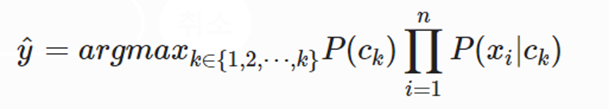

In [9]:
# 데이터 확인 
test_X.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
72,6.3,2.5,4.9,1.5


In [10]:
# 예측 할 데이터(테스트 데이터 0행 )
predict_data = np.array(test_X.iloc[0])
predict_data

array([6.3, 2.5, 4.9, 1.5])

In [11]:
#클래스별 각 피쳐의 평균 
fitted.theta_

array([[5.01621622, 3.43243243, 1.46756757, 0.25945946],
       [5.95      , 2.78409091, 4.24090909, 1.32272727],
       [6.58717949, 2.95897436, 5.57948718, 2.02820513]])

In [12]:
#클래스별 각 피쳐의 분산 
fitted.sigma_

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


array([[0.10568298, 0.14975895, 0.02705625, 0.01214025],
       [0.27068182, 0.10042872, 0.22741736, 0.04221075],
       [0.39752795, 0.11011177, 0.29188692, 0.0774096 ]])

In [13]:
# 클래스별 사전 확률(prior probability)
fitted.class_prior_

array([0.30833333, 0.36666667, 0.325     ])

In [14]:
## class별 가능도(likelihood) 산출 

likelihood = [
# 0 클래스     
(sp.stats.norm(fitted.theta_[0][0], np.sqrt(fitted.sigma_[0][0])).pdf(predict_data[0]) * \
 sp.stats.norm(fitted.theta_[0][1], np.sqrt(fitted.sigma_[0][1])).pdf(predict_data[1]) * \
 sp.stats.norm(fitted.theta_[0][2], np.sqrt(fitted.sigma_[0][2])).pdf(predict_data[2]) * \
 sp.stats.norm(fitted.theta_[0][3], np.sqrt(fitted.sigma_[0][3])).pdf(predict_data[3])),\

# 1 클래스 
(sp.stats.norm(fitted.theta_[1][0], np.sqrt(fitted.sigma_[1][0])).pdf(predict_data[0]) * \
 sp.stats.norm(fitted.theta_[1][1], np.sqrt(fitted.sigma_[1][1])).pdf(predict_data[1]) * \
 sp.stats.norm(fitted.theta_[1][2], np.sqrt(fitted.sigma_[1][2])).pdf(predict_data[2]) * \
 sp.stats.norm(fitted.theta_[1][3], np.sqrt(fitted.sigma_[1][3])).pdf(predict_data[3])),\

# 2 클래스 
(sp.stats.norm(fitted.theta_[2][0], np.sqrt(fitted.sigma_[0][0])).pdf(predict_data[0]) * \
 sp.stats.norm(fitted.theta_[2][1], np.sqrt(fitted.sigma_[0][1])).pdf(predict_data[1]) * \
 sp.stats.norm(fitted.theta_[2][2], np.sqrt(fitted.sigma_[0][2])).pdf(predict_data[2]) * \
 sp.stats.norm(fitted.theta_[2][3], np.sqrt(fitted.sigma_[0][3])).pdf(predict_data[3]))    
]

likelihood

[2.0700298536453225e-126, 0.2218869448618605, 7.497361843154609e-09]

In [15]:
## 사후확률 
posterior = likelihood * fitted.class_prior_
print(posterior)

## 정규화 
posterior / np.sum(posterior, axis=0)

[6.38259205e-127 8.13585464e-002 2.43664260e-009]


array([7.84501707e-126, 9.99999970e-001, 2.99494353e-008])

In [16]:
## scipy gnb를 사용한 추정값  
print(fitted.predict_proba(test_X)[[0]])

# 완벽히 일치하진 않지만 그에 근사하는 값을 추정값으로 계산

[[7.24143720e-126 9.23061979e-001 7.69380215e-002]]


### Prior(사전확률) 설정
- class가 발생되는 사전확률을 미리 알고 있었던 경우라고 가정

In [17]:
## "2범주"에 prior를 높게 줘서, 가중치를 주는 경우

gnb2 = GaussianNB(priors = [1/100, 1/100, 98/100])
fitted2 = gnb2.fit(iris.data, iris.target)
y_pred2 = fitted2.predict(iris.data)
confusion_matrix(iris.target,y_pred2)

array([[50,  0,  0],
       [ 0, 33, 17],
       [ 0,  0, 50]], dtype=int64)

In [18]:
## "1범주"에 prior를 높게 줘서, 가중치를 주는 경우

gnb3 = GaussianNB(priors = [1/100, 98/100, 1/100])
fitted3 = gnb3.fit(iris.data, iris.target)
y_pred3 = fitted3.predict(iris.data)
confusion_matrix(iris.target,y_pred3)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 14, 36]], dtype=int64)

## 2. Multinomial Naive Bayes (다항분포 나이브 베이즈)
- 독립변수가 범주형 변수 

In [19]:
## Multinomial Naive Bayes 라이브러리
from sklearn.naive_bayes import MultinomialNB 

## 난수생성 
import numpy as np                            

In [20]:
# 0부터 3까지 난수 생성, 변수 10개, 샘플 사이즈 4개

mNB_train_X = np.random.randint(4,size=(4,10))
mNB_train_y = np.array([1,2,3,4])

In [21]:
mNB_train_X

array([[1, 0, 2, 3, 0, 0, 2, 2, 0, 0],
       [0, 1, 3, 3, 3, 2, 1, 0, 2, 1],
       [0, 0, 0, 1, 1, 3, 0, 3, 0, 3],
       [1, 0, 1, 3, 3, 1, 2, 1, 2, 0]])

In [22]:
mNB_train_y

array([1, 2, 3, 4])

In [23]:
# 학습 
mNB = MultinomialNB()

fitted_mNB = mNB.fit(mNB_train_X, mNB_train_y)

# 첫번째 값의 예측 결과(클래스) 확인 
print(fitted_mNB.predict(mNB_train_X[:1]))

# 첫번째 값의 각 클래스별 확률 확인 
fitted_mNB.predict_proba(mNB_train_X[:1])

[1]


array([[9.65317508e-01, 3.07368325e-03, 8.12923474e-04, 3.07958848e-02]])

### Prior(사전확률) 설정
- class가 발생되는 사전확률을 미리 알고 있었던 경우라고 가정

In [24]:
clmNB_2 = MultinomialNB(class_prior = [0.1,0.5,0.1,0.1])
clmNB_2.fit(mNB_train_X,mNB_train_y)

MultinomialNB(class_prior=[0.1, 0.5, 0.1, 0.1])

In [25]:
clmNB_2.predict_proba(mNB_train_X[:1])     

array([[9.53593333e-01, 1.51817605e-02, 8.03050186e-04, 3.04218562e-02]])